<a href="https://colab.research.google.com/github/changsin/AI/blob/main/09.02.hopfield_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hopfield Network


A [Hopfield network](https://en.wikipedia.org/wiki/Hopfield_network) is a recurrent neural network that can be used to store associative memory and recognize patterns.

Neurons are fully connected by symmetric weights: i.e., the weight from neuron i to j is the same as from neuron j to i. A neuron can be either +1 (active) or -1 (inactive).

Here is a Hopfield network of six neurons that will be used throughout the article.

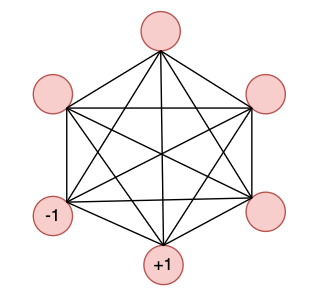


Some notable characteristics of a Hopfield netowrk are:

- **Unsupervised learning:** it does not require labels. Patterns are stored without labeled outputs.
- **Recurrent:** All neurons are interconnected with each other, meaning that each neuron can influence every other neuron in the network in a circular feedback loop.
- **Binary neuron state:** each neuron state is either active (+1) or inactive (-1).
- **No hidden neurons:** There are no hidden neurons so all nodes are visible (red).

## 1. Updating the weights

The network stores patterns by adjusting weights according to Hebbian learning, creating stable states that represent the stored memories.

$$ w_{ij} = \frac{1}{P} \Sigma_{k=1}^{P} s_i^{(k)} s_j^{(k)} $$

- $ w_{ij} $: the weight between neuron i and neuron j.
- $ s_i^k $ and $ s_j^k $: the values (activations) of neurons i and j for the kth pattern.
- P: the number of patterns to be stored.

The formula is an implementation of Hebbian learning, essentially averages the product of the states of neurons 𝑖 and 𝑗 across all patterns. To see the reasons, consider two cases:

1. If two neurons 𝑖 and 𝑗 have the same state (both +1 or both −1) in a particular pattern, their product $ S_i^{(k)} S_j^{(k)} $ will be positive. This positive value contributes to a positive weight $ w_{ij} $, encouraging these neurons to activate together.
2. If $ s_i $ and $ s_j $ have opposite states in a particular pattern (one +1 and the other −1), their product will be negative, contributing to a negative weight. This discourages the neurons from having opposite activations in future states.


The connection strengths (weights) for each pair of neurons can be represented in a 6x6 matrix.


$$
W = \begin{bmatrix}
0 & w_{12} & w_{13} & w_{14} & w_{15} & w_{16} \\
w_{21} & 0 & w_{23} & w_{24} & w_{25} & w_{26} \\
w_{31} & w_{32} & 0 & w_{34} & w_{35} & w_{36} \\
w_{41} & w_{42} & w_{43} & 0 & w_{45} & w_{46} \\
w_{51} & w_{52} & w_{53} & w_{54} & 0 & w_{56} \\
w_{61} & w_{62} & w_{63} & w_{64} & w_{65} & 0 \\
\end{bmatrix}
$$


Note that the diagonal elements are zero (wᵢᵢ ​=0) because a neuron is not connected to itself.



##2. Learning

Suppose that we are trying to train a network of six neurons for these two patterns:
- Pattern 1: $ P_1 $ = [+1,−1,+1,−1,+1,−1]
- Pattern 2: $ P_2 $ = [−1,+1,−1,+1,−1,+1]

The weight $ w_{12} $ between neurons 1 and 2 is calculated using the update formula with two patterns $ P $ = 2:
$$ w_{12} = \frac{1}{2}[(+1) \cdot (-1) + (-1) \cdot (+1)] = -1 $$

The entire weight matrix is calculated using the same formula:

$$
W = \begin{bmatrix}
0 & -1 & +1 & -1 & +1 & -1 \\
-1 & 0 & -1 & +1 & -1 & +1 \\
+1 & -1 & 0 & -1 & +1 & -1 \\
-1 & +1 & -1 & 0 & -1 & +1 \\
+1 & -1 & +1 & -1 & 0 & -1 \\
-1 & +1 & -1 & +1 & -1 & 0 \\
\end{bmatrix}
$$

Here are the weights and neuron states in a partially drawn network diagram for the pattern P1 = [+1,−1,+1,−1,+1,−1].

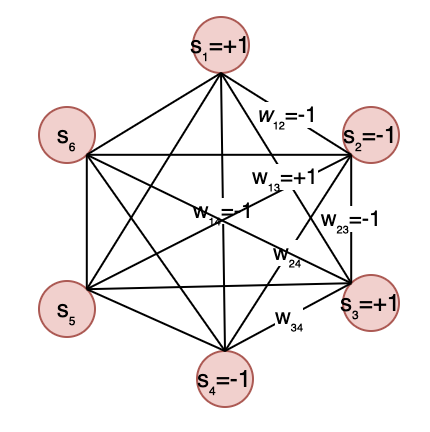

You can see that the weights (e.g., $ w_{13} $) for the same state neurons (e.g., $ s_1 $ and $ s_3 $) are positive (+1) while the weights (e.g., $ w_{12} $) for differents states are negative (-1) showing inhibitory relationships.

## 3. The Energy Function

The energy function of the Hopfield network is based on the [Principle of Energy Minimization](https://en.wikipedia.org/wiki/Ising_model) which is a restatement of [the second law of thermodynamics](https://en.wikipedia.org/wiki/Second_law_of_thermodynamics). Simply put, energy minimization is the tendency of systems to evolve toward the lowest possible energy state, as this represents maximum stability and balance.

More specifically, the energy function is derived from the [Ising model](https://en.wikipedia.org/wiki/Ising_model) in statistical mechanics, where the goal is to find configurations of a system that minimize its energy. The energy formula is a form of the [Hamiltonian function](https://en.wikipedia.org/wiki/Hamiltonian_mechanics):

$$ E = -\underset{i<j}
\Sigma
 J_{ij}s_i s_j$$

- $ J $: interaction
- $ s $: spin configuration (state)

The energy function of the Hopfield network is:

$$
E = -\frac{1}{2} \underset{i}\Sigma \underset{j}\Sigma w_{ij}s_i s_j
$$



You can see how the Hopfield energy function is closely related to the Ising model. In the Hopfield network, each configuration of neuron states is analogous to a possible configuration of magnetic spins in the Ising model, with the energy function designed to reflect the stability of these states.

Two differences from the Hamiltonian function are:
- The double summation $ \underset{i}\Sigma \underset{j}\Sigma w_{ij}s_i s_j $
computes the total interaction energy from all pairs of neurons.
- Factor of $ -\frac {1}{2} $  is used to avoid double-counting pairs ($w_{ij} s_i s_j$ and $w_{ji} s_j s_i$) and to ensure the energy is minimized when the states align with the weights ((same sign for $s_i s_j$ and $w_{ij}$)).



## 4. Inference/Recalls

Inference in a Hopfield network means recalling a stored pattern given a noisy or incomplete input.
The new state of a neuron is calculated by taking the sign of the weighted sum of all the weights multiplied by the input state.

$$ s_i^{new} =sign(\underset{j}\Sigma w_{ij} s_j) $$

The sign function returns -1 if negative, +1 if positive, 0 otherwise.

$$ sgn(x) = \begin{cases}-1&{\text{if }}x<0\\0&{\text{if }}x=0\\1&{\text{if }}x>0\end{cases} $$


Each update is a step toward lowering the network's energy function which was introduced earlier:
$$
E = -\frac{1}{2} \underset{i}\Sigma \underset{j}\Sigma w_{ij}s_i s_j
$$

This energy function is designed to decrease with each update, guiding the network to an energy minimum. As the network iterates through updates, the energy decreases until it reaches a local minimum, corresponding to one of the stored patterns. At this point, the network has "recalled" a pattern because the neurons' states no longer change, representing a stable configuration.

To see if the network learned the patterns correctly, let's feed an input to the Hopfield network.

$$ P_{input} =[+1,−1,+1,−1,+1,+1] $$

This pattern is similar to $ P_1 $ in the training data:

$$ P_1 = [+1,−1,+1,−1,+1,−1] $$

Let's see if the network retrieves it correctly.

### 1. Initialization
For the initial neuron states, you can use random values or the input value.

### 2. Calculate initial energy
Based on the initial neuron states, let's calculate each pair (i, j)


- i = 1: $ w_{1j} s_j $

 - j = 2: -1 ⋅ (+1)(-1) = +1
 - j = 3:  1 ⋅ (+1)(+1) = +1
 - j = 4: -1 ⋅ (+1)(-1) = +1
 - j = 5:  1 ⋅ (+1)(+1) = +1
 - j = 6:  1 ⋅ (+1)(+1) = +1
 - $ \underset{j}\Sigma w_{1j} s_j $ = 5

 Applying the same formula for the rest, you get the following results:
- i = 2: sum = -1
- i = 3: sum = +1
- i = 4: sum = -1
- i = 5: sum = -1
- i = 6: sum = -3

Total sum = 5 - 1 + 1 - 1 - 1 - 3 = 0

If you apply the energy formula:
$ E = - \frac{1}{2} $ x 0 = 0.



### 3. Update neuron states
To update Neuron 1, let's calculate the weighted sum for neuron 1:

$$ h_1 = w_{11}s_1 + w_{12}s_2 + w_{13}s_3 + w_{14}s_4 + w_{15}s_5 + w_{16}s6 $$
$$ h_1 = 0 + 1 + 1 + 1 + 1 + 1 = 5 $$
$$ s_1 = sign(h_1) = +1 $$

After updating Neuron 1, the state remains [+1, -1, +1, -1, +1, +1].
We keep updating other neurons (2 to 6).

The state remains the same until updating Neuron 6.

The state then changes to [ 1, -1,  1, -1,  1, -1] and the energy decreases to -11. The network reached the minimum state and the recalled pattern is exactly $ P_1 $.

## 5. Contributions of the Hopfield network
The Hopfield network was a key milestone in the development of neural networks.

**1. Hebbian Learning:** The Hopfield network popularized Hebbian learning ("cells that fire together, wire together") for updating weights in modern neural networks.

**2. Energy minimization:** The idea of using the energy function to find the minimization paved the way for Boltzmann machines, which later influenced the way multilayer neural networks use gradient descent to find the global minima.

**3. Recurrent Neural Network (RNN):** Hopfield networks were among the earliest neural networks to feature recurrent connections, where neurons feed back into themselves and interact with other neurons in a loop. This laid the groundwork for more advanced RNN architectures used today in natural language processing, time series forecasting, and other tasks.


In [ ]:
# prompt: Can you show me the Hopfield energy function result for each neuron state update for the input 𝑃1=[+1,−1,+1,−1,+1,−1]?

import numpy as np
# Define the input pattern and weight matrix for the Hopfield network example
P_input = np.array([1, -1, 1, -1, 1, 1])

# Define the hypothetical weight matrix W
W = np.array([
    [ 0, -1,  1, -1,  1,  1],
    [-1,  0, -1,  1, -1,  1],
    [ 1, -1,  0, -1,  1, -1],
    [-1,  1, -1,  0,  1,  1],
    [ 1, -1,  1,  1,  0, -1],
    [ 1,  1, -1,  1, -1,  0]
])
# Function to calculate the energy of the current state
def calculate_energy(W, state):
    energy = -0.5 * np.sum(W * np.outer(state, state))
    return energy

# Function to update a single neuron based on the current state
def update_neuron(W, state, index):
    net_input = np.dot(W[index], state)
    state[index] = 1 if net_input >= 0 else -1  # Update the neuron state based on sign of the input
    return state

# Run the updates sequentially for each neuron and calculate the energy after each update
state = P_input.copy()  # Start with the input pattern as the initial state
energy_steps = [calculate_energy(W, state)]  # Track the energy at each step
states_steps = [state.copy()]  # Track states at each step

# Sequentially update each neuron and record the energy
for i in range(len(state)):
    state = update_neuron(W, state, i)  # Update neuron i
    energy = calculate_energy(W, state)  # Calculate energy after the update
    energy_steps.append(energy)  # Store the energy
    states_steps.append(state.copy())  # Store the updated state

energy_steps, states_steps

([-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -11.0],
 [array([ 1, -1,  1, -1,  1,  1]),
  array([ 1, -1,  1, -1,  1,  1]),
  array([ 1, -1,  1, -1,  1,  1]),
  array([ 1, -1,  1, -1,  1,  1]),
  array([ 1, -1,  1, -1,  1,  1]),
  array([ 1, -1,  1, -1,  1,  1]),
  array([ 1, -1,  1, -1,  1, -1])])

In [ ]:
np.outer(P_input, P_input)

array([[ 1, -1,  1, -1,  1,  1],
       [-1,  1, -1,  1, -1, -1],
       [ 1, -1,  1, -1,  1,  1],
       [-1,  1, -1,  1, -1, -1],
       [ 1, -1,  1, -1,  1,  1],
       [ 1, -1,  1, -1,  1,  1]])

In [ ]:
W * np.outer(P_input, P_input)

array([[ 0,  1,  1,  1,  1,  1],
       [ 1,  0,  1,  1,  1, -1],
       [ 1,  1,  0,  1,  1, -1],
       [ 1,  1,  1,  0, -1, -1],
       [ 1,  1,  1, -1,  0, -1],
       [ 1, -1, -1, -1, -1,  0]])

## Code

In [ ]:
import numpy as np

class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))

    def train(self, patterns):
        """
        Trains the network using a list of patterns.
        Each pattern should be a binary array of -1s and 1s.
        """
        num_patterns = len(patterns)
        for pattern in patterns:
            # Update weights based on Hebbian learning rule
            self.weights += np.outer(pattern, pattern)
        # Zero out the diagonal to avoid self-connections
        np.fill_diagonal(self.weights, 0)
        # Normalize by the number of patterns
        self.weights /= num_patterns

    def recall(self, pattern, max_steps=10):
        """
        Recalls a pattern from memory, given an initial pattern.
        Updates the pattern until convergence or max_steps is reached.
        """
        state = pattern.copy()
        for i in range(max_steps):
            # Calculate the new state by updating each neuron asynchronously
            new_state = np.sign(self.weights @ state)
            print(f"{i} {new_state}")
            new_state[new_state == 0] = 1  # Convert zeros to ones for stability
            # Check if the state has converged
            if np.array_equal(new_state, state):
                break
            state = new_state
        return state

# Example usage
if __name__ == "__main__":
    # Define patterns to store (-1 and +1 values)
    P1 = np.array([1, -1, 1, -1, 1, -1])
    P2 = np.array([-1, 1, -1, 1, -1, 1])

    # Initialize Hopfield network
    hopfield_net = HopfieldNetwork(num_neurons=6)
    hopfield_net.train([P1, P2])  # Train with patterns

    # Test the network with an input pattern
    test_pattern = np.array([1, -1, 1, -1, 1, 1])  # A pattern similar to P1
    recalled_pattern = hopfield_net.recall(test_pattern)

    print("Test pattern:       ", test_pattern)
    print("Recalled pattern:   ", recalled_pattern)


0 [ 1. -1.  1. -1.  1. -1.]
1 [ 1. -1.  1. -1.  1. -1.]
Test pattern:        [ 1 -1  1 -1  1  1]
Recalled pattern:    [ 1. -1.  1. -1.  1. -1.]


In [ ]:
hopfield_net.weights

array([[ 0., -1.,  1., -1.,  1., -1.],
       [-1.,  0., -1.,  1., -1.,  1.],
       [ 1., -1.,  0., -1.,  1., -1.],
       [-1.,  1., -1.,  0., -1.,  1.],
       [ 1., -1.,  1., -1.,  0., -1.],
       [-1.,  1., -1.,  1., -1.,  0.]])